### Importing libraries

In [208]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load Dataset

In [211]:
df = pd.read_csv("Weather.csv")
df

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog
...,...,...,...,...,...,...,...,...
8779,12/31/2012 19:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,12/31/2012 20:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,12/31/2012 21:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,12/31/2012 22:00,-0.2,-1.8,89,28,9.7,99.91,Snow


### Understand the Dataset

In [214]:
df.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [216]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


In [218]:
df.describe()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,8.798144,2.555294,67.431694,14.945469,27.664447,101.051623
std,11.687883,10.883072,16.918881,8.688696,12.622688,0.844005
min,-23.300000,-28.500000,18.000000,0.000000,0.200000,97.520000
25%,0.100000,-5.900000,56.000000,9.000000,24.100000,100.560000
50%,9.300000,3.300000,68.000000,13.000000,25.000000,101.070000
75%,18.800000,11.800000,81.000000,20.000000,25.000000,101.590000
max,33.000000,24.400000,100.000000,83.000000,48.300000,103.650000


In [220]:
df.shape

(8784, 8)

In [222]:
df.columns

Index(['Date/Time', 'Temp_C', 'Dew Point Temp_C', 'Rel Hum_%',
       'Wind Speed_km/h', 'Visibility_km', 'Press_kPa', 'Weather'],
      dtype='object')

In [224]:
df.dtypes

Date/Time            object
Temp_C              float64
Dew Point Temp_C    float64
Rel Hum_%             int64
Wind Speed_km/h       int64
Visibility_km       float64
Press_kPa           float64
Weather              object
dtype: object

In [226]:
df['Date/Time'] = pd.to_datetime(df['Date/Time'])

In [228]:
df.set_index('Date/Time',inplace=True)

In [230]:
df.dtypes

Temp_C              float64
Dew Point Temp_C    float64
Rel Hum_%             int64
Wind Speed_km/h       int64
Visibility_km       float64
Press_kPa           float64
Weather              object
dtype: object

In [232]:
df.isnull().sum()

Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Weather             0
dtype: int64

In [234]:
df['Year']=df.index.year
df['Month']=df.index.month
df['Day']=df.index.day
df['Hour']=df.index.hour

### Temperature Insights

In [237]:
#Average,Min,Max
print("Average Temperature:",df['Temp_C'].mean())
print("Minimum Temperature:",df['Temp_C'].min())
print("Maximum Temperature:",df['Temp_C'].max())

Average Temperature: 8.798144353369764
Minimum Temperature: -23.3
Maximum Temperature: 33.0


In [239]:
#Extreme Temperature
extreme_temp = df[(df['Temp_C']>35)|(df['Temp_C']<-10)]
print("Extreme Weather Events (High/Low temperature):")
print(extreme_temp[['Temp_C','Weather']])

Extreme Weather Events (High/Low temperature):
                     Temp_C        Weather
Date/Time                                 
2012-01-03 02:00:00   -10.5   Snow Showers
2012-01-03 03:00:00   -11.3   Snow Showers
2012-01-03 04:00:00   -12.6         Cloudy
2012-01-03 05:00:00   -12.9   Snow Showers
2012-01-03 06:00:00   -13.3   Snow Showers
...                     ...            ...
2012-12-31 01:00:00   -10.7         Cloudy
2012-12-31 02:00:00   -10.1         Cloudy
2012-12-31 03:00:00   -11.8  Mostly Cloudy
2012-12-31 04:00:00   -10.5         Cloudy
2012-12-31 05:00:00   -10.2         Cloudy

[494 rows x 2 columns]


In [241]:
#Monthly Temperature
Temp_monthly= df.groupby('Month')['Temp_C'].mean()
print(Temp_monthly)

Month
1     -7.371505
2     -4.225000
3      3.121237
4      7.009306
5     16.237769
6     20.134028
7     22.790054
8     22.279301
9     16.484444
10    10.954973
11     0.931389
12    -3.306317
Name: Temp_C, dtype: float64


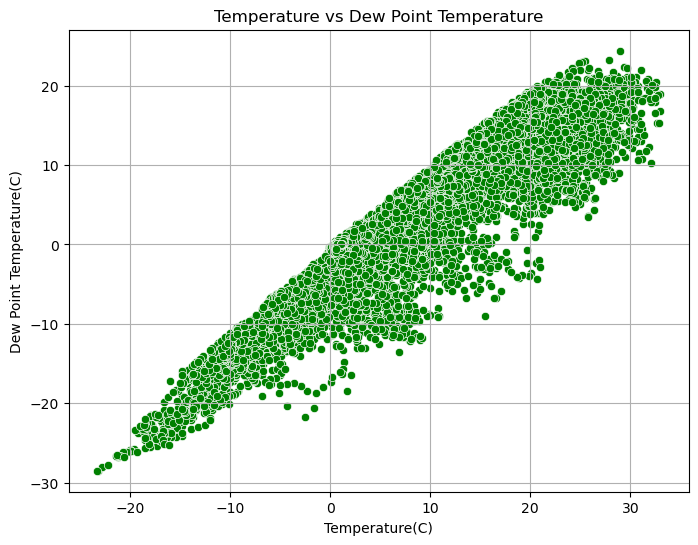

In [243]:
#Relation between Temperature and Dew Point
plt.figure(figsize=(8,6))
sns.scatterplot(x='Temp_C',y='Dew Point Temp_C', data=df, color='Green')
plt.title('Temperature vs Dew Point Temperature')
plt.xlabel('Temperature(C)')
plt.ylabel('Dew Point Temperature(C)')
plt.grid()
plt.show() 

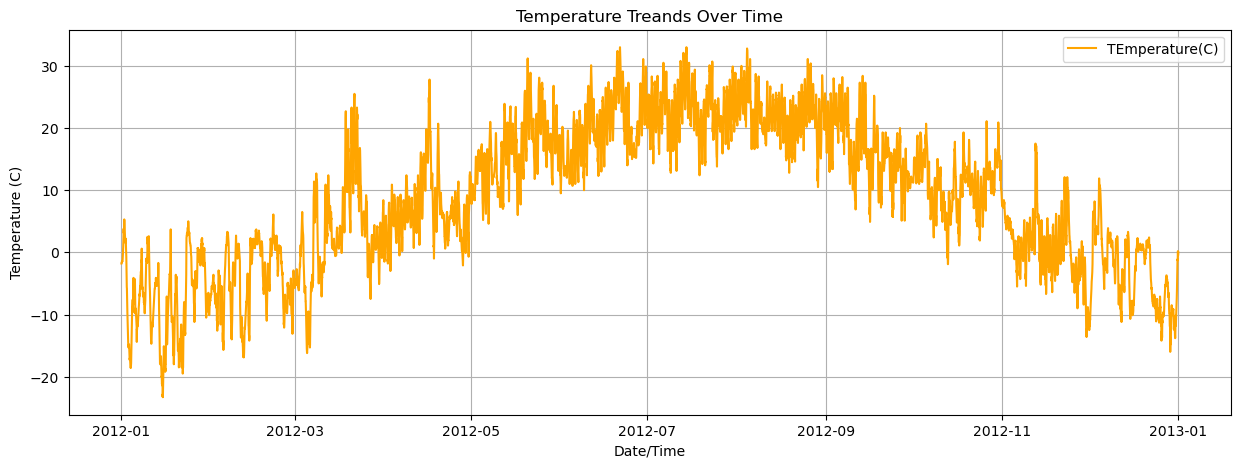

In [245]:
#Temperature Treands Over Time
plt.figure(figsize=(15,5))
plt.plot(df.index,df['Temp_C'], color='orange',label='TEmperature(C)')
plt.title('Temperature Treands Over Time')
plt.xlabel('Date/Time')
plt.ylabel('Temperature (C)')
plt.legend()
plt.grid()
plt.show()

### Humidity Analysis

In [248]:
print("Average Humidity:", df['Rel Hum_%'].mean())

Average Humidity: 67.43169398907104


In [250]:
#Monthly Average Humidity
Avg_Hum = df.groupby('Month')['Rel Hum_%'].mean()

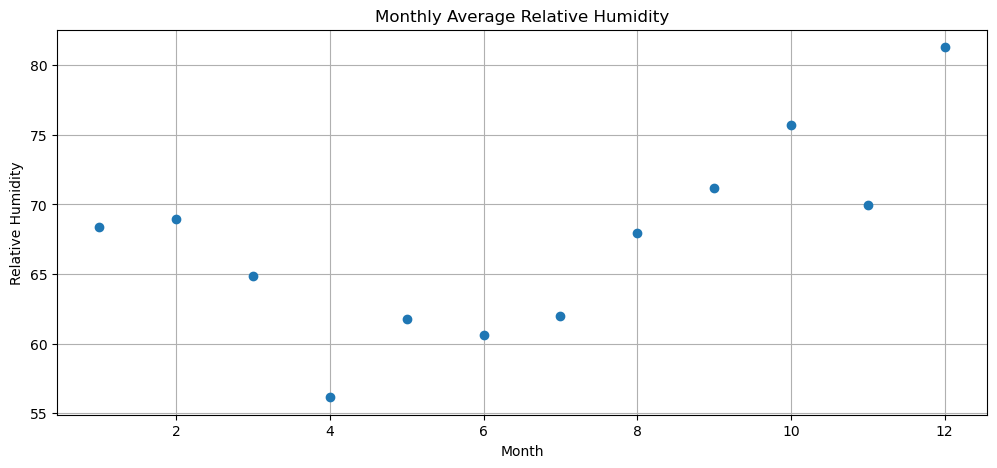

In [267]:
plt.figure(figsize=(12,5))
plt.plot(Avg_Hum,'o')
plt.title('Monthly Average Relative Humidity')
plt.xlabel('Month')
plt.ylabel('Relative Humidity')
plt.grid()
plt.show()

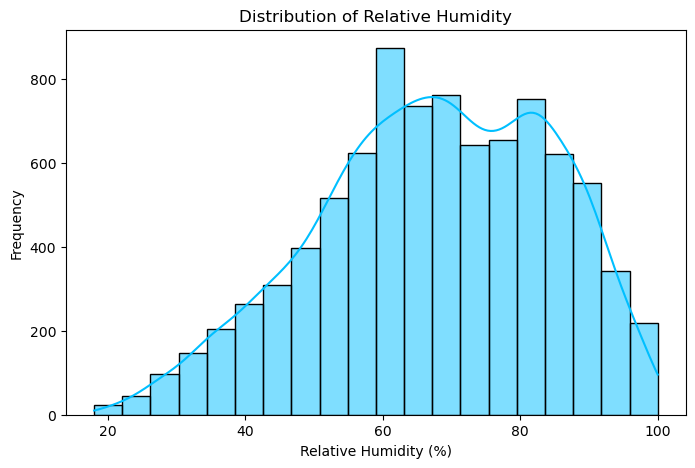

In [351]:
#Distribution of Relative Humidity
plt.figure(figsize=(8,5))
sns.histplot(df['Rel Hum_%'],kde= True, bins=20,color='deepskyblue')
plt.title('Distribution of Relative Humidity')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Frequency')
plt.show()

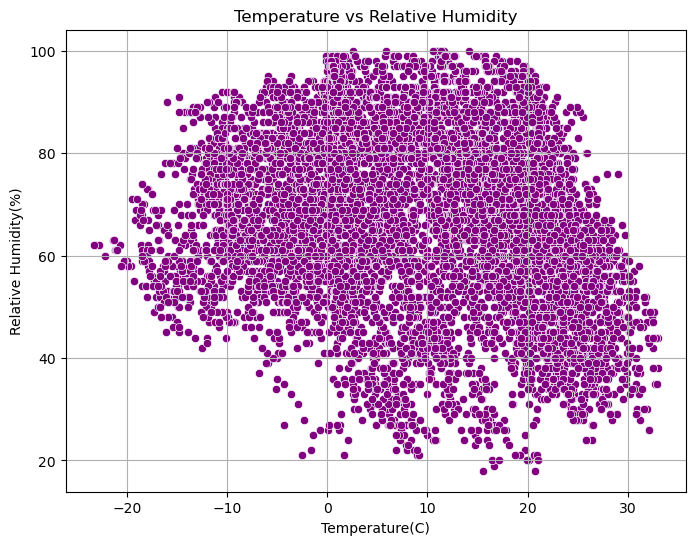

In [279]:
#Relation between Temperature and Humidity
plt.figure(figsize=(8,6))
sns.scatterplot(x='Temp_C', y='Rel Hum_%', data=df, color='purple')
plt.title('Temperature vs Relative Humidity')
plt.xlabel('Temperature(C)')
plt.ylabel('Relative Humidity(%)')
plt.grid()
plt.show()

### Visibility and Weather Conditions

In [318]:
#Pattern in Reduced Visibility
reduced_visibility= df[df['Visibility_km']<5]
print("Reduced Visibility Events")
print(reduced_visibility[['Visibility_km','Weather']])

Reduced Visibility Events
                     Visibility_km               Weather
Date/Time                                               
2012-01-01 02:00:00            4.0  Freezing Drizzle,Fog
2012-01-01 03:00:00            4.0  Freezing Drizzle,Fog
2012-01-01 04:00:00            4.8                   Fog
2012-01-01 09:00:00            4.0                   Fog
2012-01-01 10:00:00            1.2                   Fog
...                            ...                   ...
2012-12-30 03:00:00            3.6              Snow,Fog
2012-12-30 05:00:00            4.0              Snow,Fog
2012-12-31 08:00:00            3.2          Snow Showers
2012-12-31 09:00:00            2.4                  Snow
2012-12-31 21:00:00            4.8                  Snow

[378 rows x 2 columns]


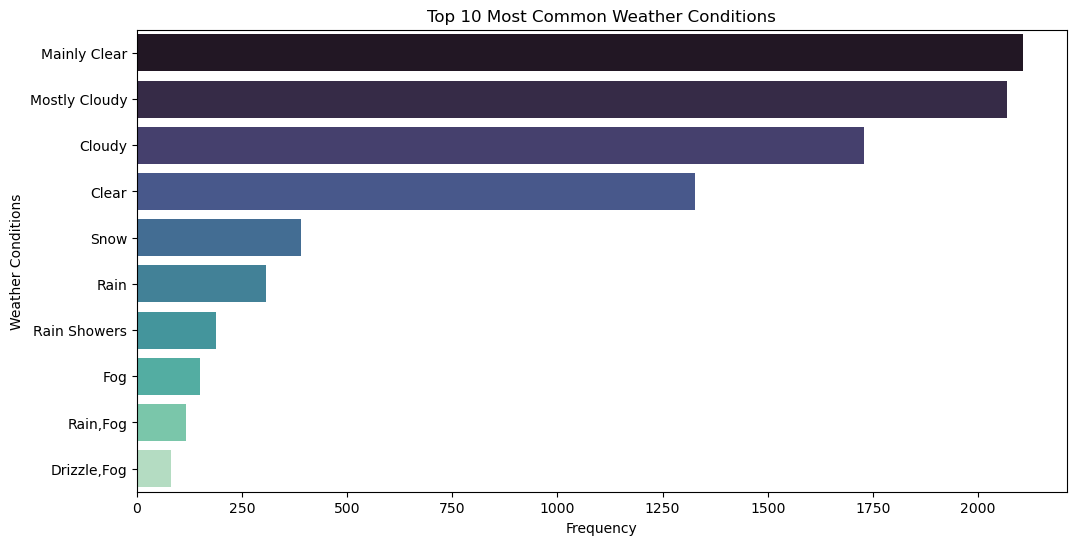

In [306]:
# Top 10 Most Common weather Conditions

weather_counts = df['Weather'].value_counts().head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=weather_counts.values, y=weather_counts.index, hue=weather_counts.index,palette="mako")
plt.title('Top 10 Most Common Weather Conditions')
plt.xlabel('Frequency')
plt.ylabel('Weather Conditions')
plt.show()

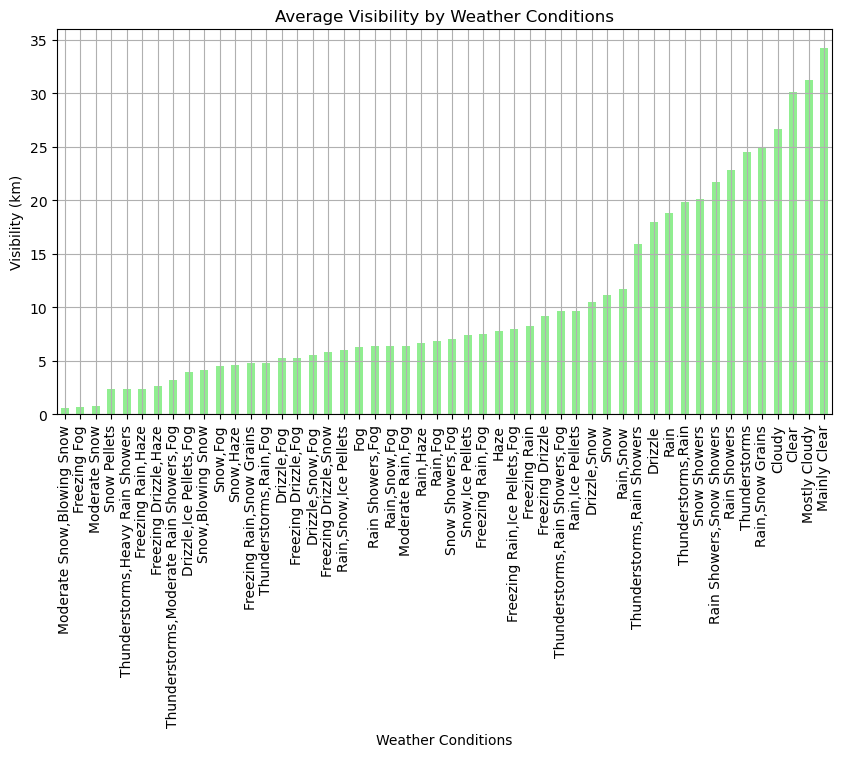

In [314]:
#Aveage Visibility during different Weather Conditions

visibility_by_weather = df.groupby('Weather')['Visibility_km'].mean().sort_values()
plt.figure(figsize=(10,5))
visibility_by_weather.plot(kind='bar',color='lightgreen')
plt.title('Average Visibility by Weather Conditions')
plt.xlabel('Weather Conditions')
plt.ylabel('Visibility (km)')
plt.grid()
plt.show()

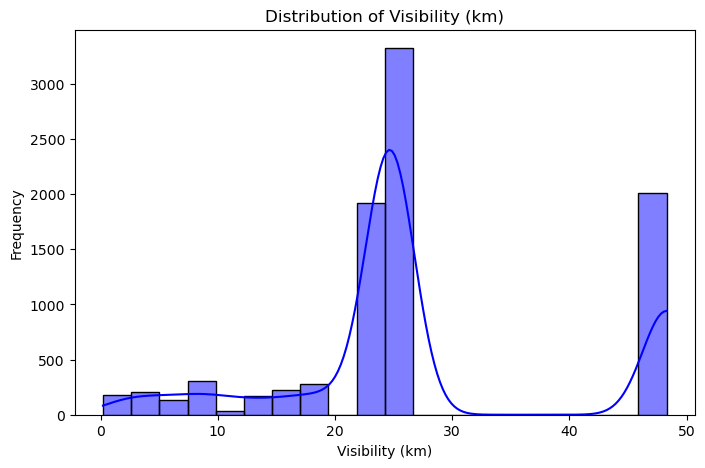

In [326]:
#Distribution of Visibility
plt.figure(figsize=(8,5))
sns.histplot(df['Visibility_km'],kde=True,color='blue',bins=20)
plt.title('Distribution of Visibility (km)')
plt.xlabel('Visibility (km)')
plt.ylabel('Frequency')
plt.show()

### Pressure Analysis

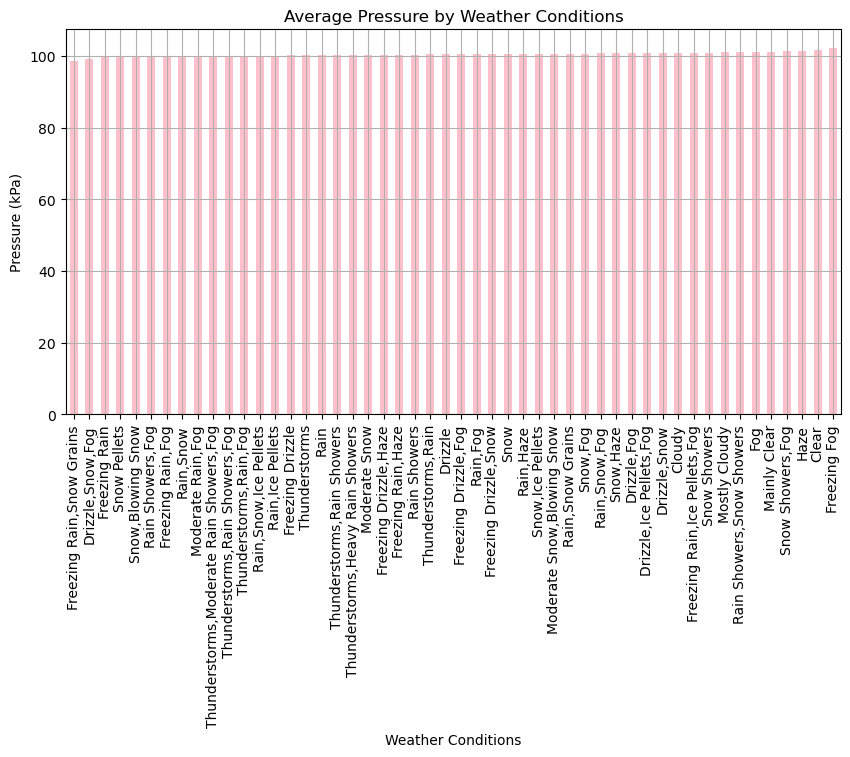

In [334]:
#Correlation between Pressure and Weather Conditions

pressure_weather = df.groupby('Weather')['Press_kPa'].mean().sort_values()

plt.figure(figsize=(10,5))
pressure_weather.plot(kind='bar',color='pink')
plt.title('Average Pressure by Weather Conditions')
plt.xlabel('Weather Conditions')
plt.ylabel('Pressure (kPa)')
plt.grid()
plt.show()

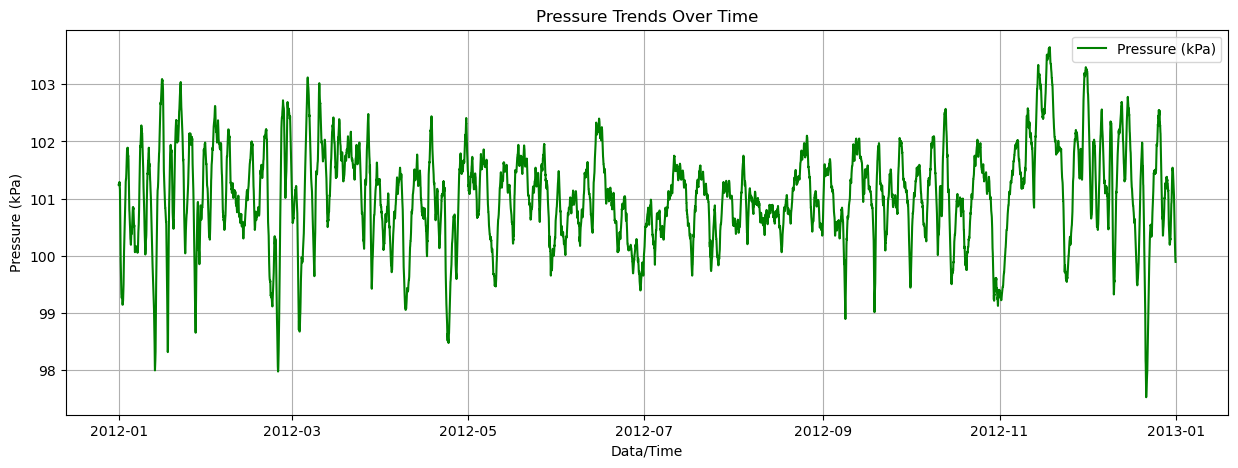

In [340]:
#Trends in Pressure Over Time

plt.figure(figsize=(15,5))
plt.plot(df.index,df['Press_kPa'],color='green',label='Pressure (kPa)')
plt.title('Pressure Trends Over Time')
plt.xlabel('Data/Time')
plt.ylabel('Pressure (kPa)')
plt.legend()
plt.grid()
plt.show()

### Wind Speed Pattern

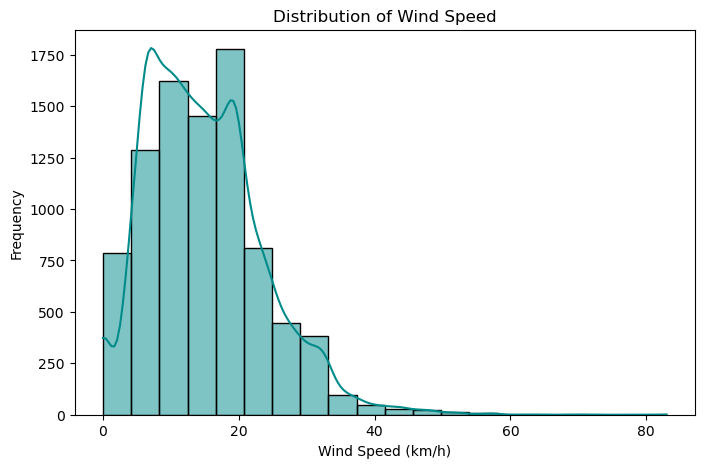

In [349]:
#Distribution Of Wind Speed

plt.figure(figsize=(8,5))
sns.histplot(df['Wind Speed_km/h'], kde=True, bins=20, color='darkcyan')
plt.title('Distribution of Wind Speed')
plt.xlabel('Wind Speed (km/h)')
plt.ylabel('Frequency')
plt.show()

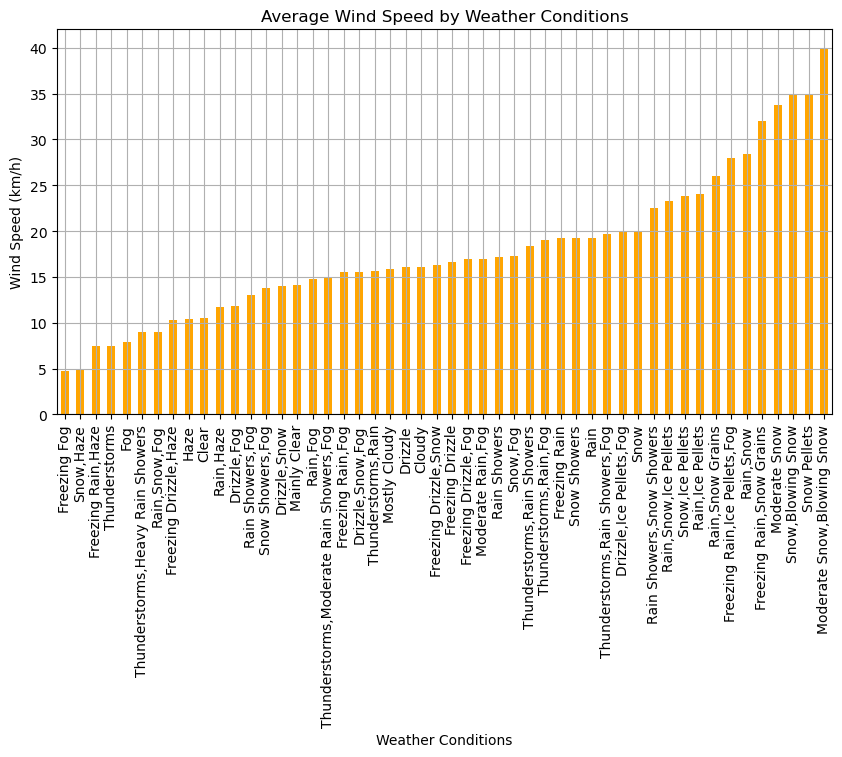

In [353]:
#Relation between Wind Speed and Weather Conditions

wind_speed_weather = df.groupby('Weather')['Wind Speed_km/h'].mean().sort_values()

plt.figure(figsize=(10,5))
wind_speed_weather.plot(kind='bar',color='Orange')
plt.title('Average Wind Speed by Weather Conditions')
plt.xlabel('Weather Conditions')
plt.ylabel('Wind Speed (km/h)')
plt.grid()
plt.show()

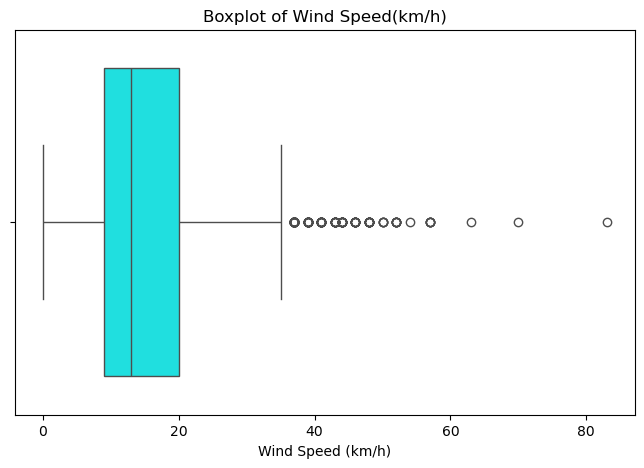

In [376]:
#Boxplot of wind Speed

plt.figure(figsize=(8,5))
sns.boxplot(x=df['Wind Speed_km/h'],color='cyan')
plt.title('Boxplot of Wind Speed(km/h)')
plt.xlabel('Wind Speed (km/h)')
plt.show()

### Correlation Heatmap

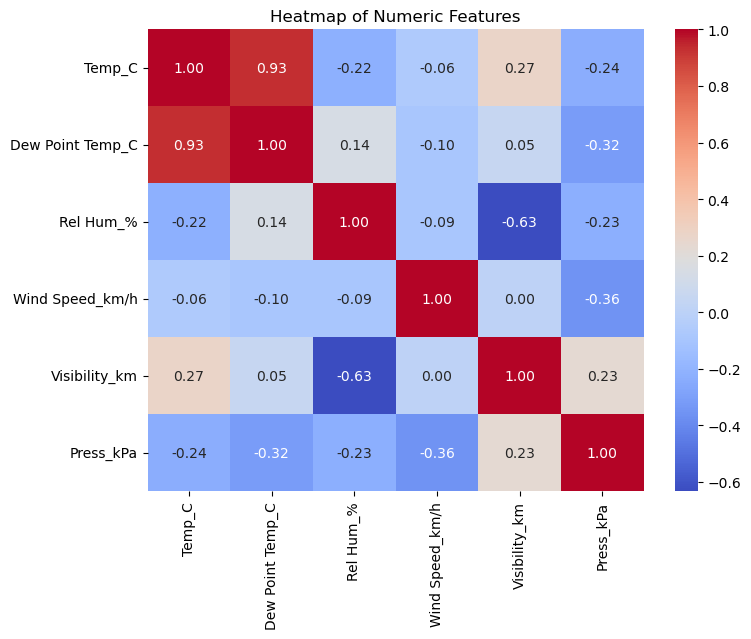

In [374]:
plt.figure(figsize=(8,6))
numeric_data=df.select_dtypes(include=['float64','int64'])
correlation_matrix=numeric_data.corr()
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt='.2f')
plt.title('Heatmap of Numeric Features')
plt.show()